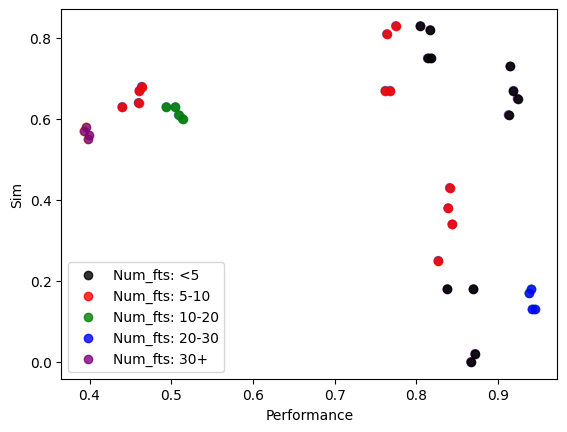

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your CSV file is named "data.csv", adjust the filename if necessary
file_path = "method_sim_perf_num_fts.csv"

# Read the data from the CSV file and create the scatter plot
df = pd.read_csv(file_path)
plt.scatter(df["Perf"], df["Sim"], c=df["Num_fts"], cmap="viridis", alpha=0.8)

# # Add labels and a color bar
# plt.xlabel('Performance')
# plt.ylabel('Sim')
# plt.colorbar(label='Num_fts')

# # Show the plot
# plt.show()

# # Create a new column to indicate whether Num_fts is less than or greater than 10
# df['Num_fts_binary'] = df['Num_fts'].apply(lambda x: '<=10' if x <= 10 else '>10')

# # Create the scatter plot with binary color coding
# plt.scatter(df['Perf'], df['Sim'], c=df['Num_fts_binary'].map({'<=10': 'red', '>10': 'blue'}), alpha=0.8)

# # Add labels and a custom color legend
# plt.xlabel('Performance')
# plt.ylabel('Sim')
# plt.legend(title='Num_fts', labels=['<=10', '>10'])

# # Show the plot
# plt.show()


# Create a new column 'Num_fts_category' with categorical values based on 'Num_fts' ranges
df["Num_fts_category"] = pd.cut(
    df["Num_fts"],
    bins=[0, 5, 10, 20, 30, float("inf")],
    labels=["<5", "5-10", "10-20", "20-30", "30+"],
)

# Define the color map for categorical values
color_map = {
    "<5": "black",
    "5-10": "red",
    "10-20": "green",
    "20-30": "blue",
    "30+": "purple",
}

# Create the scatter plot with color-coded points
for category, color in color_map.items():
    plt.scatter(
        df[df["Num_fts_category"] == category]["Perf"],
        df[df["Num_fts_category"] == category]["Sim"],
        c=color,
        label=f"Num_fts: {category}",  # Custom legend label
        alpha=0.8,
    )

# Add labels and the legend
plt.xlabel("Performance")
plt.ylabel("Sim")
plt.legend(loc="best")

# Show the plot
plt.show()


In [6]:
import statsmodels.api as sm

# Define the predictor variables (X) and the target variable (y)
X = df[["Perf", "Num_fts"]]
y = df["Sim"]

# Add a constant term to the predictor variables (for the intercept term in the regression)
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    Sim   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     5.824
Date:                Wed, 19 Jul 2023   Prob (F-statistic):            0.00682
Time:                        14:14:07   Log-Likelihood:                 5.0306
No. Observations:                  36   AIC:                            -4.061
Df Residuals:                      33   BIC:                            0.6894
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0841      0.171      6.334      0.0